In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from datetime import datetime
from datetime import timedelta

import math



# Problem

### We have been provided a historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and we're tasked to give business insights that most compelling this dataset,and what is the effect of seasonality on store sales


# Data Overview:
The data has been taken from Walmart Recruiting challenge on kaggle. Data Field contains a total of 4 datasets:

1-features.csv

2-stores.csv

3-train.csv

4-test.csv

In [2]:
#Read CSV file 
df_features = pd.read_csv('features.csv')
df_stores = pd.read_csv('stores.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') 

In [3]:

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



### (features.csv) file contains the following fields:
Store: the store number

Date: the date 

Temperature: the average temperature in the region

Fuel_Price: the cost of fuel in the region

MarkDown1–5: anonymized data related to promotional markdowns that Walmart is running.Any missing value is marked with an NAN.

CPI: The consumer price index

Unemployment:The unemployment rate

IsHoliday:Whether the week is a special holiday week

In [5]:
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
df_features.fillna(0,inplace=True)
df_features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [7]:
df_features[["Temperature"]] = df_features[["Temperature"]].fillna(df_features[["Temperature"]].mean())
df_features[["Fuel_Price"]] = df_features[["Fuel_Price"]].fillna(df_features[["Fuel_Price"]].mean())
df_features[["CPI"]] = df_features[["CPI"]].fillna(df_features[["CPI"]].mean())

In [8]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
df_features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [10]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### (store.csv) file contains information about the 45 stores, indicating the type and size of the store.

Store: store number

Types: types of the store

Size: size of the store

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


### (train.csv) file contains historical training data. Within this file we will find the following fields:
Store: store number

Dept: department number

Date : the dates of sales

Weekly_Sales : sales for the given department in the given store

IsHoliday : whether the week is a special holiday week


In [13]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [15]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### (test.csv) file is similar  to train.csv, except we have withheld the weekly sales.I must predict the sales for each triplet of store, department, and date in this file.

## Explore Data and visualize it 

In [16]:
df_stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

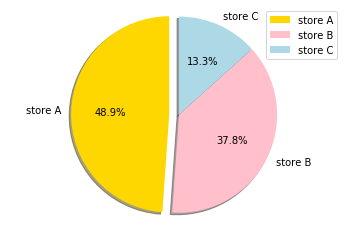

In [17]:
#visual representation for store types
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'pink', 'lightblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

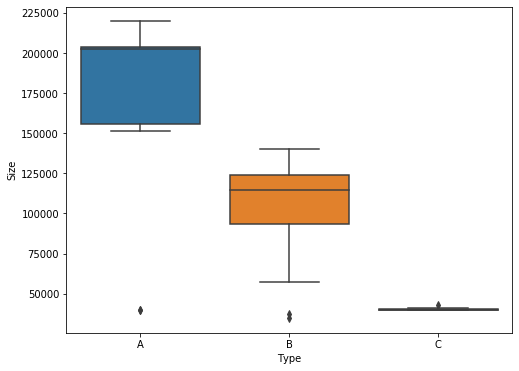

In [18]:
# boxplot to show the size of each type of store
store_type = pd.concat([df_stores['Type'], df_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

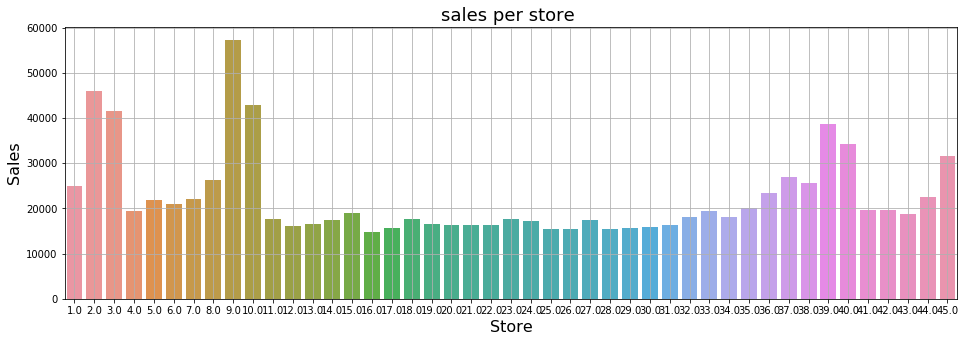

In [19]:
##Let's see how much sales per store during the week

salesXstore = df_train['Weekly_Sales'].groupby(df_stores['Store']).mean()

plt.figure(figsize=(16,5))
sns.barplot(salesXstore.index, salesXstore.values)

plt.grid()
plt.title('sales per store ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

### Observation

**There are 45 stores in total.**

**There are a total of 3 types of stores: Type A, B, and C.**

**By boxplot and piechart, we can say that type A store is the largest store and C is the smallest,and there's no overlapped area in size among A, B, and C.**

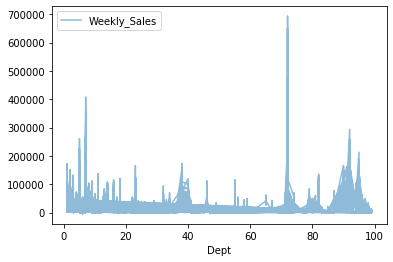

In [20]:
#let's first understand the department frequency 

df_train.plot(kind='line',x='Dept',y='Weekly_Sales',alpha=1.5,fig=(4,5))

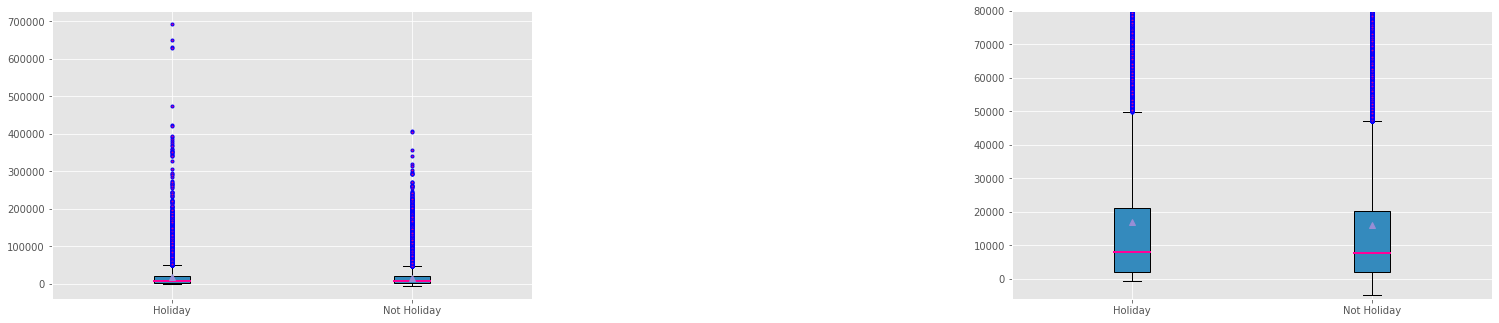

In [21]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (25,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=df_train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

medianprop={'color':'#FF0099',
            'linewidth': 2,
            'linestyle':'-'}


flierprop={'color' : '#9900CC',
          'marker' : 'o',
          'markerfacecolor': '#CC0099',
          'markeredgecolor':'blue',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

### It clearly show that sales on holiday is a little bit more than sales in not-holiday

### Also ,From the previous plot, we notice the Department with the highest sales lies between Dept 60 and 80

### ---> Since we have dates we can get use of pandas libraries and try to make them more useful

In [22]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

#The week arrangeed of the year.
df_train['Week'] = df_train['Date'].dt.week
df_test['Week'] = df_test['Date'].dt.week

#The day of the week 
df_train['Day_of_week'] =df_train['Date'].dt.dayofweek
df_test['Day_of_week'] =df_test['Date'].dt.dayofweek

#The month of year
df_train['Month'] =df_train['Date'].dt.month 
df_test['Month'] =df_test['Date'].dt.month 

#The year of the datetime.
df_train['Year'] =df_train['Date'].dt.year
df_test['Year'] =df_test['Date'].dt.year

#The days of the datetime.
df_train['Day'] =df_train['Date'].dt.day 
df_test['Day'] =df_test['Date'].dt.day

##### In order to efficiently modify our data, we'll merge the two datasets for now.

In [23]:
df_features['Date'] = pd.to_datetime(df_features['Date'])

#merge the features
trainXfeature = pd.merge_asof(df_train, df_features, on='Store',by='Date')
testXfeature = pd.merge_asof(df_test, df_features, on='Store',by='Date')

In [24]:
#merge all the features
trainXsfeature = pd.merge(trainXfeature,df_stores)
testXsfeature = pd.merge(testXfeature,df_stores)

In [25]:
trainXsfeature.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.5,False,5,4,2,2010,5,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [26]:
testXsfeature.head(1)

,Store,Dept,Date,IsHoliday_x,Week,Day_of_week,Month,Year,Day,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,44,4,11,2012,2,55.32,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315


#### As we have “IsHoliday ”feature in each of the datasets, it has been duplicated. let's make it correct by removing one of them and rename it to the original “IsHoliday” column name.

In [27]:
#drop the dublicate of IsHoliday column
trainXfeature = trainXsfeature.drop(columns=['IsHoliday_x'])
testXfeature = testXsfeature.drop(columns=['IsHoliday_x'])

#let's rename the IsHoliday_y column to IsHoliday
trainXfeature = trainXsfeature.rename(columns={"IsHoliday_y": "IsHoliday"})
testXfeature =  testXsfeature.rename(columns={"IsHoliday_y": "IsHoliday"})

In [28]:
##let's represent IsHoliday column in numeric values, by changing IsHoliday column 
##with ‘False’ to be 0 and ‘True’ to be 1.
def paron(x):
    if x == False:
        return 0
    return 1
#Train.csv
Score = trainXfeature['IsHoliday']
postiveNegtave = Score.map(paron)
trainXfeature['IsHoliday'] = postiveNegtave
print("Shape of trainXfeature: ", trainXfeature.shape)

#Test.csv
Score_test = testXfeature['IsHoliday']
postiveNegtave = Score.map(paron)
testXfeature['IsHoliday'] = postiveNegtave
print("Shape of testXfeature: ", testXfeature.shape)

Shape of trainXfeature:  (421570, 22)
Shape of testXfeature:  (115064, 21)


[]

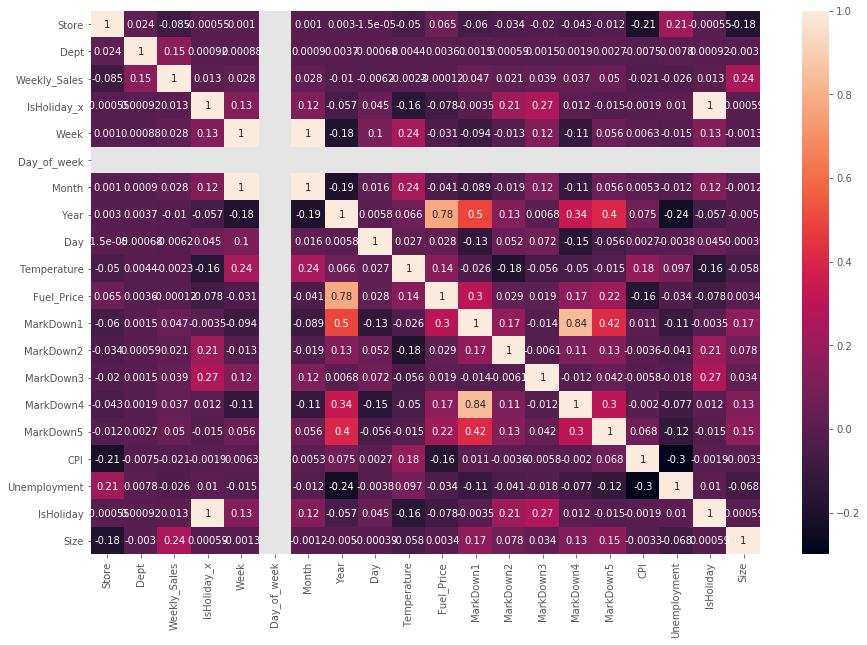

In [29]:
corr=trainXfeature.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.plot()

#### there is a clear correlation between size and store which effecting the sales

0.015810449498679723


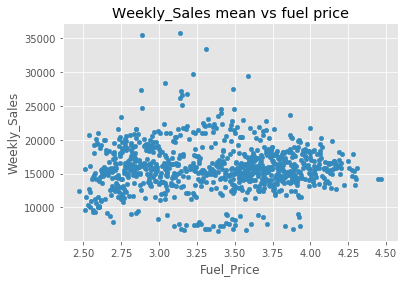

In [30]:
fuel = trainXfeature.groupby("Fuel_Price")["Weekly_Sales"].mean().reset_index()
print(fuel["Fuel_Price"].corr(fuel["Weekly_Sales"]))
fuel.plot.scatter("Fuel_Price", "Weekly_Sales", title="Weekly_Sales mean vs fuel price")

#### There is no Correlation between fuel and sales